# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to create a video, explaining the main part of the code, upload it to youtube or any other video sharing service and provide the link in the form given in the submission section of the course.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
1. Video for Feature 1: 15 marks
1. Feature 2: 35 marks
1. Video for Feature 2: 15 marks

In [15]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dataPath import DATA_PATH

Load faceBlendCommon file to use common functions.

In [16]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '../week3'))
import faceBlendCommon as fbc

In [17]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [18]:
# Landmark model location
PREDICTOR_PATH =  DATA_PATH+"models/shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

In [19]:
im = cv2.imread(DATA_PATH+"images/ted_cruz.jpg")

imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
# plt.imshow(imDlib)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [20]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)
print(points)

[(149, 328), (147, 366), (147, 401), (150, 437), (159, 474), (175, 509), (200, 539), (230, 565), (271, 575), (317, 571), (362, 552), (402, 526), (433, 493), (451, 454), (458, 412), (461, 371), (463, 328), (159, 301), (170, 280), (193, 270), (220, 270), (245, 278), (301, 278), (332, 269), (365, 269), (395, 279), (417, 301), (272, 314), (270, 346), (268, 378), (265, 411), (237, 416), (251, 425), (269, 434), (290, 425), (309, 417), (189, 321), (204, 312), (223, 311), (240, 322), (222, 324), (204, 324), (322, 323), (341, 312), (361, 313), (378, 322), (360, 325), (342, 325), (213, 457), (234, 454), (255, 454), (274, 457), (293, 454), (322, 454), (354, 457), (324, 481), (295, 490), (274, 491), (254, 489), (233, 478), (224, 460), (255, 465), (274, 467), (294, 464), (345, 459), (294, 474), (275, 475), (255, 472)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1: Lipstick</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

In [21]:
# Apply Lipstick

featurePoints = points[48:68]

# Create a mask for the lips
lipstick_color = (255,125,120)
mask = np.zeros(imDlib.shape,dtype=imDlib.dtype)
featurePoints = np.array(featurePoints, dtype = np.int32)
cv2.fillPoly(mask,[featurePoints],lipstick_color)


maskHeight, maskWidth = mask.shape[0:2]
maskSmall = cv2.resize(mask, (600, int(maskHeight * 600.0 / maskWidth)))
maskSmall = cv2.dilate(maskSmall, (3, 3))
maskSmall = cv2.GaussianBlur(maskSmall, (5, 5), 0, 0)
mask = cv2.resize(maskSmall, (maskWidth, maskHeight))
mask_rgb = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
# plt.imshow(mask_rgb)

r1 = cv2.boundingRect(np.float32(featurePoints))
# Bounding rectangle r1 has 4 elements: left(x1), top(y1), 
# width(w), height(h)
center1X = r1[0] + int(r1[2]/2.0)
center1Y = r1[1] + int(r1[3]/2.0)
center = (center1X, center1Y)

## Seamless cloning the mask with the lips. In this case MIXED_CLONE allow to maintain the lips texture
masked_lips = cv2.bitwise_and(im, im, mask=mask[:, :, 0])
output = cv2.seamlessClone(masked_lips, mask_rgb, mask[:, :, 0], center, cv2.MIXED_CLONE)
output_rgb = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
# plt.imshow(output_rgb)

alphaMask = cv2.cvtColor(output_rgb, cv2.COLOR_RGB2GRAY)
alphaMask = cv2.merge((alphaMask, alphaMask, alphaMask))

alpha = np.float32(alphaMask) /255.0
fore = np.float32(mask) / 255.0
back = np.float32(imDlib) / 255.0


# Apply alpha blending I = a*F + (1-a)*B
outImage = alpha*fore + (1 - alpha)*back

# plt.figure(figsize=(20,20))
# plt.subplot(141)
# plt.imshow(mask)
# plt.subplot(142)
# plt.imshow(alpha)
# plt.subplot(143)
# plt.imshow(imDlib)
# plt.subplot(144)
# plt.imshow(outImage)


In [22]:
# Method 2

imEyeContour = imDlib.copy()

lips = points[48:68]

for p in lips:
    cv2.circle(imEyeContour,p,2,(255,0,0),thickness=5)

mask = np.zeros_like(imDlib)
mask = cv2.fillPoly(mask,[np.array(lips)], (255,255,255))

imLips= cv2.bitwise_and(imDlib,mask)

imColor = np.zeros_like(mask)
# Lipstick color
imColor[:]= 255,0,0 
imColor =cv2.bitwise_and(imLips,imColor)
imColor =cv2.GaussianBlur(imColor,(9,9),10)

imGray = imDlib.copy()
imColor = cv2.addWeighted(imGray,1,imColor,1,0)
# imColor = cv2.cvtColor(imColor,cv2.COLOR_BGR2RGB)
  

stack = np.hstack((imEyeContour, mask, imLips,imColor))
# plt.axis("off")
# plt.imshow(imColor)

# <font color="blue">Feature 2: Sunglass</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

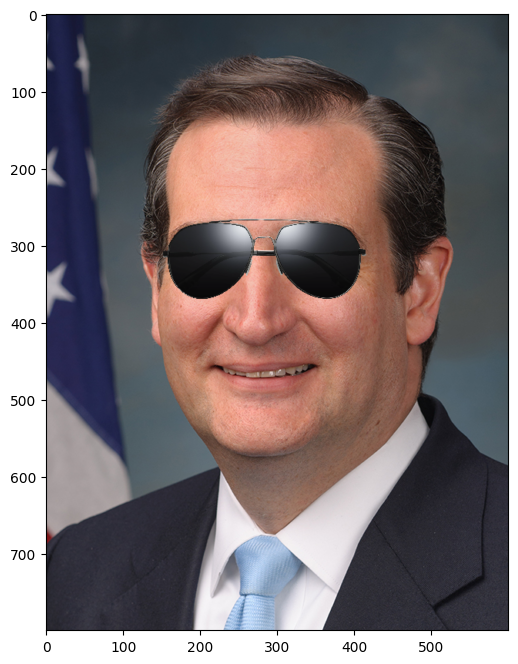

In [23]:
sunglass = cv2.imread(DATA_PATH+"images/sunglass1.png", cv2.IMREAD_UNCHANGED)

imEyeContour = imDlib.copy()

leftEyePoints = np.array(points[36:42])
rightEyePoints = np.array(points[42:48])

leftEyeStart = points[36]
rightEyeEnd = points[45]

eyeDistance = np.linalg.norm(np.array(rightEyeEnd) - np.array(leftEyeStart))
sunglassWidth = int(eyeDistance*1.5)

centerEye = ((leftEyePoints[0]+rightEyePoints[3])//2)

def calculate_angle(eye_points):
    left_point = eye_points[0]
    right_point = eye_points[3]
    delta_x = right_point[0] - left_point[0]
    delta_y = right_point[1] - left_point[1]
    angle = np.arctan2(delta_y, delta_x) * 180.0 / np.pi
    return angle

eye_angle = calculate_angle(leftEyePoints)

# Rotate the sunglasses image to match the angle of the eyes
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0, 0))
    return rotated

rotatedSunglass = rotate_image(sunglass, eye_angle)

# Resize the rotated sunglasses image to fit the width between the eyes
resizeSunglass = cv2.resize(sunglass, (sunglassWidth, int(sunglassWidth * rotatedSunglass.shape[0] / rotatedSunglass.shape[1])))

topLeft = (int(centerEye[0]-sunglassWidth//2), int(centerEye[1]-sunglassWidth//4))

sw, sh, _ = resizeSunglass.shape
(r,g,b,a) = cv2.split(resizeSunglass)
sunglassRGB = cv2.merge((r,g,b))
sunglassAlpha = cv2.merge((a,a,a))/255.0
sunglassAlpha = np.dstack([sunglassAlpha])

# Overlay the sunglasses on the image
for c in range(0, 3):
    imEyeContour[topLeft[1]:topLeft[1] + sw, topLeft[0]:topLeft[0] + sh, c] = (
        sunglassRGB[:, :, c] * sunglassAlpha[:, :, 0] + imEyeContour[topLeft[1]:topLeft[1] + sw, topLeft[0]:topLeft[0] + sh, c] * (1.0 - sunglassAlpha[:, :, 0])
    )
    
plt.imshow(imEyeContour)

# <font color="blue">Feature 3: Lens Color</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

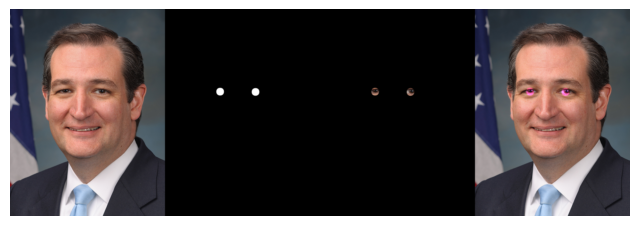

In [24]:
imEyeContour = imDlib.copy()

leftEyePoints = np.array(points[36:42])
rightEyePoints = np.array(points[42:48])

# Calculate Centroid
leftCenter = np.mean(leftEyePoints, axis=0).astype(int)
rightCenter = np.mean(rightEyePoints, axis=0).astype(int)

leftEyeHull = cv2.convexHull(leftEyePoints)
rightEyeHull = cv2.convexHull(rightEyePoints)

radius = 15
color = (255,255,255)
mask = np.zeros_like(imDlib)
# cv2.fillConvexPoly(mask, leftEyeHull,color)
# cv2.fillConvexPoly(mask, rightEyeHull, color)
cv2.circle(mask, leftCenter,radius,color, -1)
cv2.circle(mask, rightCenter, radius,color, -1)


imEye= cv2.bitwise_and(imDlib,mask)

imColor = np.zeros_like(mask)
imColor[:]= 255,0,255
imColor =cv2.bitwise_and(imEye,imColor)
imColor =cv2.GaussianBlur(imColor,(9,9),1)

imGray = imDlib.copy()
imColor =cv2.addWeighted(imGray,1,imColor,1,0)
  

stack = np.hstack((imDlib, mask, imEye,imColor))
plt.axis("off")
plt.imshow(stack)

In [25]:

imEyeContour = imDlib.copy()

leftEyePoints = np.array(points[36:42])
rightEyePoints = np.array(points[42:48])

leftCenter = np.mean(leftEyePoints, axis=0).astype(int)
rightCenter = np.mean(rightEyePoints, axis=0).astype(int)

radius = 15
color = (255,255,)
mask = np.zeros_like(imDlib)
mask = cv2.circle(mask, leftCenter,radius,color, -1)
mask = cv2.circle(mask, rightCenter, radius,color, -1)

imEye= cv2.bitwise_and(imDlib,mask)

imColor = np.zeros_like(mask)
imColor[:]= 255,0,255
imColor =cv2.bitwise_and(imEye,imColor)
imColor =cv2.GaussianBlur(imColor,(9,9),1)

imGray = imDlib.copy()
imColor =cv2.addWeighted(imGray,1,imColor,1,0)
  

stack = np.hstack((imEyeContour, mask, imEye,imColor))
# plt.axis("off")
# plt.imshow(imColor)


# <font color="blue">Feature 4: Eye Liner</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

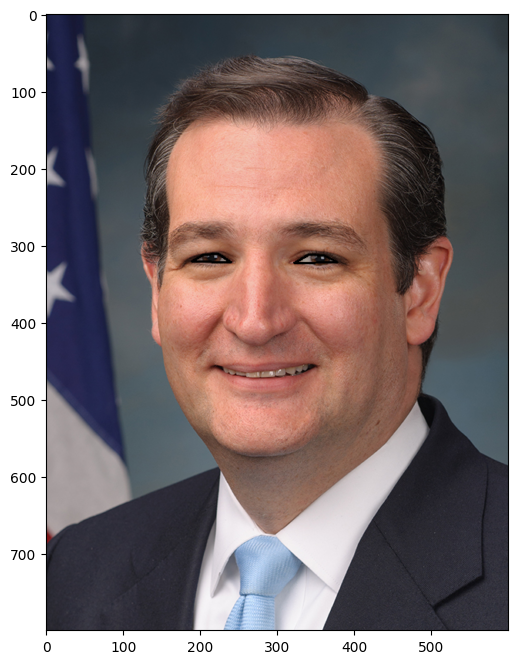

In [43]:
im_eyeliner = imDlib.copy()
left_eye =  np.array(points[36:40])
right_eye = np.array(points[42:46])


color = (0,0,0)
thickness = 2
cv2.polylines(im_eyeliner,[left_eye], True, color=color, thickness = thickness)
cv2.polylines(im_eyeliner,[right_eye],  True, color=color, thickness = thickness)

plt.imshow(im_eyeliner)



# def smooth_curve(points, smoothness=10):
#     """Smooths a set of 2D points using spline interpolation."""
#     if points is None or len(points) < 3:
#         return None
#     x, y = points.T
#     dist = np.cumsum(np.sqrt((np.diff(x)**2) + (np.diff(y)**2)))
#     dist = np.insert(dist, 0, 0)
#     try:
#         fx = interp1d(dist, x, kind='cubic')
#         fy = interp1d(dist, y, kind='cubic')
#         dist_smooth = np.linspace(0, dist[-1], int(dist[-1] * smoothness))
#         x_smooth = fx(dist_smooth)
#         y_smooth = fy(dist_smooth)
#         return np.array([x_smooth, y_smooth]).T
#     except Exception as e:
#         print(f"An error occurred during smoothing: {e}")
#         return None

# def draw_eyeliner(img, side="left", color=(0, 0, 0), thickness=2):
#     """Draws eyeliner on the specified eye."""
#     if side == "left":
#         eye_points = points[36:42]  # Left eye landmarks (36-41)
#     elif side == "right":
#         eye_points = points[42:48]  # Right eye landmarks (42-47)
#     else:
#         return

#     # Extract relevant points for the eyeliner (adjust indices as needed)
#     eyeliner_points = np.array([eye_points[0], eye_points[1], eye_points[2], eye_points[3], eye_points[4], eye_points[5]])

#     # Smooth the eyeliner curve
#     smoothed_eyeliner = smooth_curve(eyeliner_points, smoothness=5)

#     if smoothed_eyeliner is not None:
#         smoothed_eyeliner = np.int32(smoothed_eyeliner).reshape((-1, 1, 2))
#         cv2.polylines(img, [smoothed_eyeliner], True, color, thickness)

# draw_eyeliner(im_eyeliner,  side="left", color=(0,0,0), thickness=2)  # Black eyeliner
# draw_eyeliner(im_eyeliner,  side="right", color=(0,0,0), thickness=2) # Black eyeliner

# plt.imshow(im_eyeliner)


In [44]:
imSunglass = cv2.imread(DATA_PATH+"images/sunglass.png", cv2.IMREAD_UNCHANGED)
imSunglassCopy = imSunglass.copy()
leftEyePoints = np.array([850,750])
rightEyePoints = np.array([2550,750])

cv2.circle(imSunglassCopy,tuple(leftEyePoints),20,(0,0,255), -1)
cv2.circle(imSunglassCopy,tuple(rightEyePoints),20,(0,0,255), -1)
imSunglassCopy = cv2.cvtColor(imSunglassCopy,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,4))
# plt.imshow(imSunglassCopy)


# Eyes
imCopy = imDlib.copy()
for p in range(36,42):
    cv2.circle(imCopy,points[p],3,(255,0,0), -1)

for p in range(42,48):
    cv2.circle(imCopy,points[p],3,(255,0,0), -1)

leftEyeCenter = ((np.array(points[36])+np.array(points[39]))/2).astype(int)
rightEyeCenter = ((np.array(points[42])+np.array(points[45]))/2).astype(int)
print("[INFO] Left Center {}".format(leftEyeCenter))
print("[INFO] Right Center {}".format(rightEyeCenter))
# cv2.circle(imCopy, leftEyeCenter, 3, (255, 0, 0), -1)
# cv2.circle(imCopy, rightEyeCenter, 3, (255, 0, 0), -1)

[INFO] Left Center [214 321]
[INFO] Right Center [350 322]


<Figure size 400x400 with 0 Axes>

In [488]:
# Apply Eye Lashes
eyeImg = cv2.imread(DATA_PATH+"images/eyelashes.png", cv2.IMREAD_UNCHANGED)
b,g,r,a = cv2.split(eyeImg)
eyeImg = cv2.merge((b,g,r))
eyeMask = cv2.merge((a,a,a))
eyeMaskLeft = cv2.flip(eyeMask, 1)

eyeMask = np.float32(eyeMask)/255.0
eyeMaskLeft = np.float32(eyeMaskLeft)/255.0

# plt.figure(figsize=[15,10])
# plt.subplot(131);plt.imshow(eyeImg[...,::-1])
# plt.subplot(132);plt.imshow(eyeMask[...,::-1])
# plt.subplot(133);plt.imshow(eyeMaskLeft[...,::-1])


# Left eye polygon
leftEyePoints = points[36:41]

# Right eye polygon
rightEyePoints = points[42:47]

featurePoints = leftEyePoints + rightEyePoints

sizeEyeImg = eyeImg.shape    
rect = (0, 0, sizeEyeImg[1], sizeEyeImg[0])
dt = fbc.calculateDelaunayTriangles(rect, featurePoints)

if len(dt) == 0:
    print("No delaunay triangle found")


eyeImg = np.float32(imDlib)/255.0
eyeImgWarped = np.zeros(imDlib.shape)
eyeMaskWarped = np.zeros(imDlib.shape)

# Apply affine transformation to Delaunay triangles
for i in range(0, len(dt)):
    t1 = []
    t2 = []

    #get points for img1, img2 corresponding to the triangles
    for j in range(0, 3):
      t1.append(featurePoints[dt[i][j]])
      t2.append(featurePoints[dt[i][j]])

    fbc.warpTriangle(eyeImg, eyeImgWarped, t1, t2)
    fbc.warpTriangle(eyeMask, eyeMaskWarped, t1, t2)

# plt.imshow(eyeImgWarped)


[INFO] Left Center [214 321]
[INFO] Right Center [350 322]
[INFO] Rotation Angle: 0.0°
[INFO] Eye Distance: 136.0036764208968
[INFO] Sunglass Distance: 1700.0


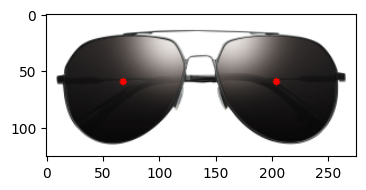

In [ ]:
def get_angle(p1, p2):
    if p2[1] <= p1[1]:
        y = np.abs(p1[1] - p2[1])
    else:
        y = p1[1] - p2[1]
    x = np.abs(p1[0] - p2[0])
    return np.rad2deg(np.arctan2(y, x))

# Sunglasses
imSunglass = cv2.imread(DATA_PATH+"images/sunglass1.png", cv2.IMREAD_UNCHANGED)
imSunglass = cv2.cvtColor(imSunglass, cv2.COLOR_BGR2RGB)

imSunglassCopy = imSunglass.copy()
leftEyePoints = np.array([850,750])
rightEyePoints = np.array([2550,750])

cv2.circle(imSunglassCopy,tuple(leftEyePoints),20,(0,0,255), -1)
cv2.circle(imSunglassCopy,tuple(rightEyePoints),20,(0,0,255), -1)
imSunglassCopy = cv2.cvtColor(imSunglassCopy,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,4))
# plt.imshow(imSunglassCopy)


# Eyes
imCopy = imDlib.copy()
for p in range(36,42):
    cv2.circle(imCopy,points[p],3,(255,0,0), -1)

for p in range(42,48):
    cv2.circle(imCopy,points[p],3,(255,0,0), -1)

leftEyeCenter = ((np.array(points[36])+np.array(points[39]))/2).astype(int)
rightEyeCenter = ((np.array(points[42])+np.array(points[45]))/2).astype(int)
print("[INFO] Left Center {}".format(leftEyeCenter))
print("[INFO] Right Center {}".format(rightEyeCenter))
cv2.circle(imCopy, leftEyeCenter, 3, (255, 0, 0), -1)
cv2.circle(imCopy, rightEyeCenter, 3, (255, 0, 0), -1)

# Check Eye Angle
rotationAngle = get_angle(leftEyePoints, rightEyePoints)
print("[INFO] Rotation Angle: {}°".format(rotationAngle))
angle_deg = 0
center_x = int(imCopy.shape[1]/2)
center_y = int(imCopy.shape[0]/2)
M = cv2.getRotationMatrix2D((center_x, center_y), angle_deg, 1.0)
imCopy = cv2.warpAffine(imCopy, M, (imCopy.shape[1], imCopy.shape[0]))


# Find Distance
eye_distance = np.linalg.norm(leftEyeCenter-rightEyeCenter)
sunglass_distance = np.linalg.norm(leftEyePoints-rightEyePoints)
print("[INFO] Eye Distance: {}".format(eye_distance))
print("[INFO] Sunglass Distance: {}".format(sunglass_distance))
finalImage =np.hstack((imDlib,imCopy))
# plt.imshow(finalImage)

# Resize
ratio = eye_distance / sunglass_distance
sunglass_w = int(imSunglass.shape[1] * ratio)
sunglass_h = int(imSunglass.shape[0] * ratio)

imSunglassResize = cv2.resize(imSunglass, (sunglass_w,sunglass_h), interpolation = cv2.INTER_AREA)
leftEyePointsResize = (leftEyePoints * ratio).astype(int)
rightEyePointsResize = (rightEyePoints * ratio).astype(int)

_imSunglassResize = imSunglassResize.copy()
cv2.circle(_imSunglassResize, leftEyePointsResize, 3, (255, 0, 0), -1)
cv2.circle(_imSunglassResize, rightEyePointsResize, 3, (255, 0, 0), -1)

plt.imshow(_imSunglassResize)

# https://deepnote.com/app/jose-luis-verdugo/Virtual-Makeup-OpenCV-Face-Landmarks-1eeab981-1e5b-45f6-993f-5e087646e7c1


In [490]:
"""
Apply Lipstick 

1. Find Lips landmark
2. Fill points on the image with lips color
3. Create mask of lips points 
4. Apply alpha blending for final result

"""

""" 
Face Swap

1. Get Landmarks points for both image
2. Find convexHull Index of points1
3. Read convexHull index and save in differnt array
4. Calculate delaunay Trianlges of hull array 2
5. Use hull array to create delauny traingles array
6. Apply warp triangle
7. Create mask using hull array 2 using fillConvexPoly
8. Apply seamless cloning
""" 

""" 
Beardify

1. Manually create corresponding points and index of landmarks for beard 
2. Load corresponding points of beard image called featurePoints1
3. Calculate delaunay Trianlges of featurePoints1
4. Get landmakrks of target image 
5. Create featurePoints2 using beard index make sure its within the bound
6. Use featurePonts to create delauny traingles t1 t2
7. Apply warp triangle using t1 t2
"""

""" 
Wrinkles

1. Create extra points like forehead points and attach reference points for stretching
2. Get Landmarks points for both image
3. Append forhead points
4. Calculate delaunay Trianlges of points1
5. Apply warp triangle using dt
6. Create face mask of points2 and 
    6.1 create convex hull
    6.2 create mask using convex hull index
    6.3 remove nose, mouth and eye  (replace with black color)
7. Apply seamless cloning
8. Apply blur on forehead to match
"""


' \nWrinkles\n\n1. Create extra points like forehead points and attach reference points for stretching\n2. Get Landmarks points for both image\n3. Append forhead points\n4. Calculate delaunay Trianlges of points1\n5. Apply warp triangle using dt\n6. Create face mask of points2 and \n    6.1 create convex hull\n    6.2 create mask using convex hull index\n    6.3 remove nose, mouth and eye  (replace with black color)\n7. Apply seamless cloning\n8. Apply blur on forehead to match\n'